In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from pyecharts import options as opts
from pyecharts.charts import Pie
from random import randint
from pyecharts.globals import CurrentConfig, NotebookType

CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK


In [2]:
# 解决matplotlib中文乱码

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
users_df = pd.read_csv('data/users.csv', encoding = 'gbk')
sessions_df =pd.read_csv('data/sessions.csv', encoding = 'gbk')

In [4]:
users_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
sessions_df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [6]:
users_df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [7]:
sessions_df.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

## 数据集说明：
这是一个在线民宿网站，Airbnb（爱彼迎）的用户数据(users.csv)及Web会话记录(sessions.csv)，此数据集中的所有用户均来自美国。数据字段的描述和说明见字段说明Excel表。


## 1、	用户画像分析（user表）

### 用户性别的分布；

In [8]:
user_sex_df = users_df.groupby('gender', as_index=False)['id'].agg({'user_gender_count':'count'})
user_sex_df

,gender,user_gender_count
0,-unknown-,95688
1,FEMALE,63041
2,MALE,54440
3,OTHER,282


Text(0.5, 1.0, 'Airbnb用户的性别分布')

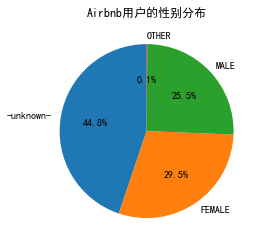

In [9]:
labels = user_sex_df['gender']
Y = user_sex_df['user_gender_count']
fig = plt.figure()
plt.pie(Y, labels=labels, autopct='%0.1f%%', startangle=90)
plt.title("Airbnb用户的性别分布")

### 用户年龄的分布；

In [10]:
users_df['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

从年龄字段都数据来看，我们可以发现数据存在异常，推测可能有人将当年年份或是出生年份当做age填入，在数据分箱时，将115以上的年龄划分为异常类

<BarContainer object of 8 artists>

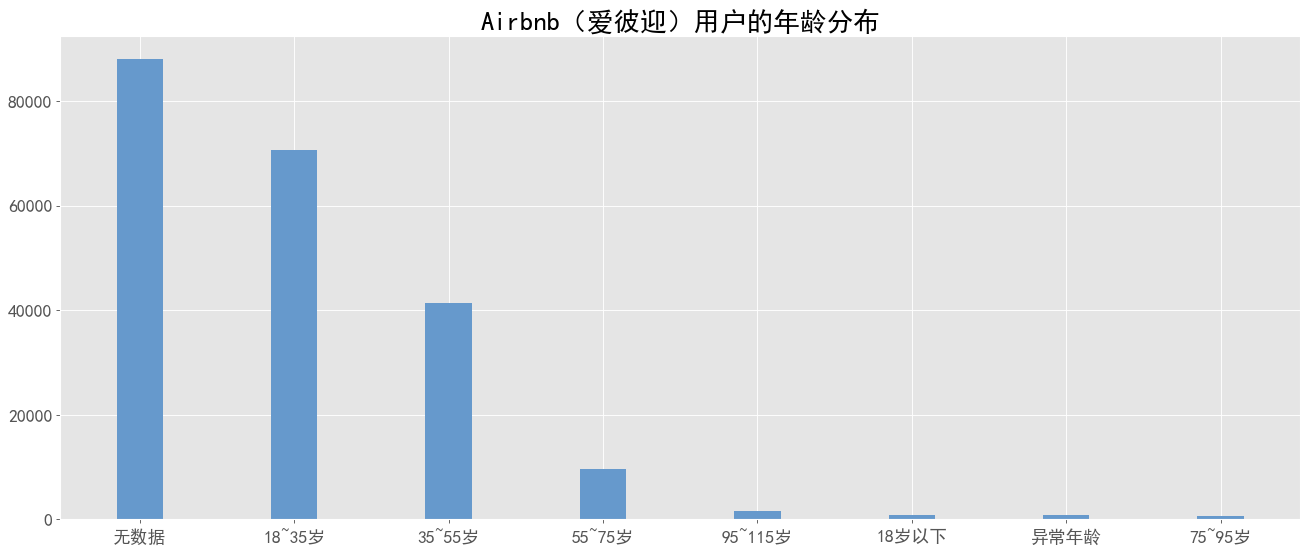

In [11]:

users_cut_df = pd.cut(users_df['age'] , bins=[0, 18,35,55,75,95,115,2015])

users_age_cout=pd.value_counts(users_cut_df)
type(users_age_cout)
users_age_cout = users_age_cout.tolist()

users_age_cout.insert(0,87990)#增加缺失值数量
users_age_cout
#x = ['18岁以下', '18~35岁',  '35~55岁', '75~95岁', '95~115岁', '异常年龄',"无数据"]
x = ["无数据", '18~35岁',  '35~55岁', '55~75岁','95~115岁','18岁以下', '异常年龄','75~95岁' ]
y = users_age_cout

plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')

plt.title("Airbnb（爱彼迎）用户的年龄分布", size=24) # 图标题

plt.xticks(size=16) # x轴字体大小调整
plt.yticks(size=16) # y轴字体大小调整

plt.bar(x, y, width=0.3, color='#6699CC')

### 用户设备的分布；

In [12]:
user_device_type_df = users_df.groupby('first_device_type', as_index=False)['id'].agg({'user_device_count':'count'})

user_device_type_df = user_device_type_df.sort_values(by='user_device_count',ascending=False)
user_device_type_df

,first_device_type,user_device_count
3,Mac Desktop,89600
6,Windows Desktop,72716
8,iPhone,20759
7,iPad,14339
4,Other/Unknown,10667
0,Android Phone,2803
1,Android Tablet,1292
2,Desktop (Other),1199
5,SmartPhone (Other),76


<BarContainer object of 9 artists>

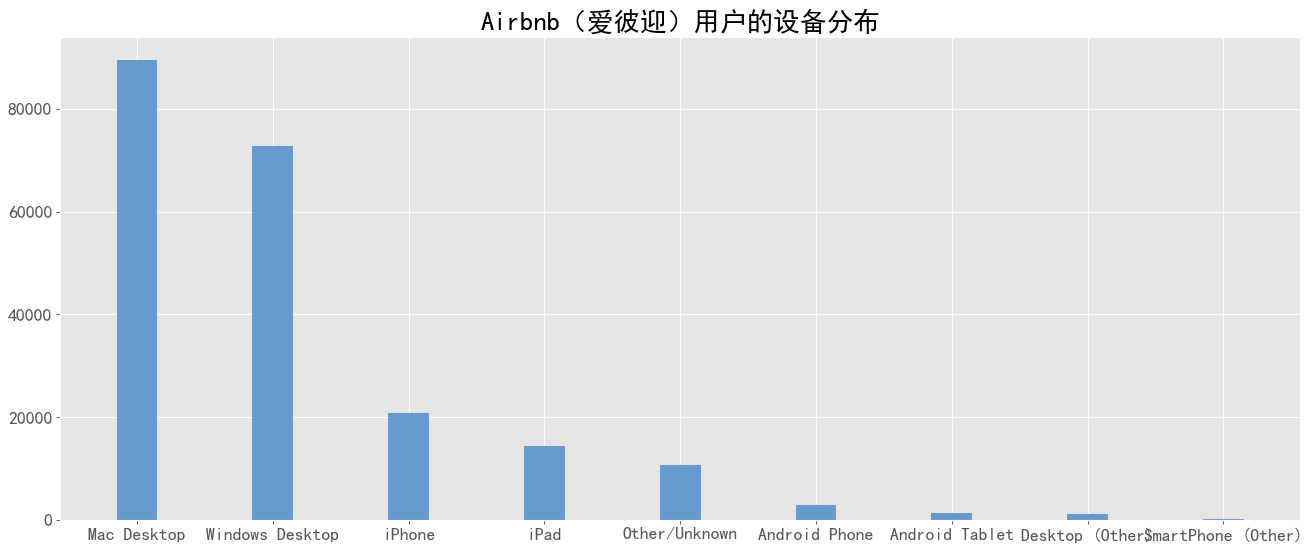

In [13]:
labels = user_device_type_df['first_device_type']
Y = user_device_type_df['user_device_count']


plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')

plt.title("Airbnb（爱彼迎）用户的设备分布", size=24) # 图标题

plt.xticks(size=16) # x轴字体大小调整
plt.yticks(size=16) # y轴字体大小调整

plt.bar(labels, Y, width=0.3, color='#6699CC')

### 用户目的地的分布

In [14]:
user_destination_df = users_df.groupby('country_destination', as_index=False)['id'].agg({'country_destination_count':'count'})

user_destination_df = user_destination_df.sort_values(by='country_destination_count',ascending=False)
user_destination_df

,country_destination,country_destination_count
7,NDF,124543
10,US,62376
11,other,10094
4,FR,5023
6,IT,2835
5,GB,2324
3,ES,2249
1,CA,1428
2,DE,1061
8,NL,762


<BarContainer object of 12 artists>

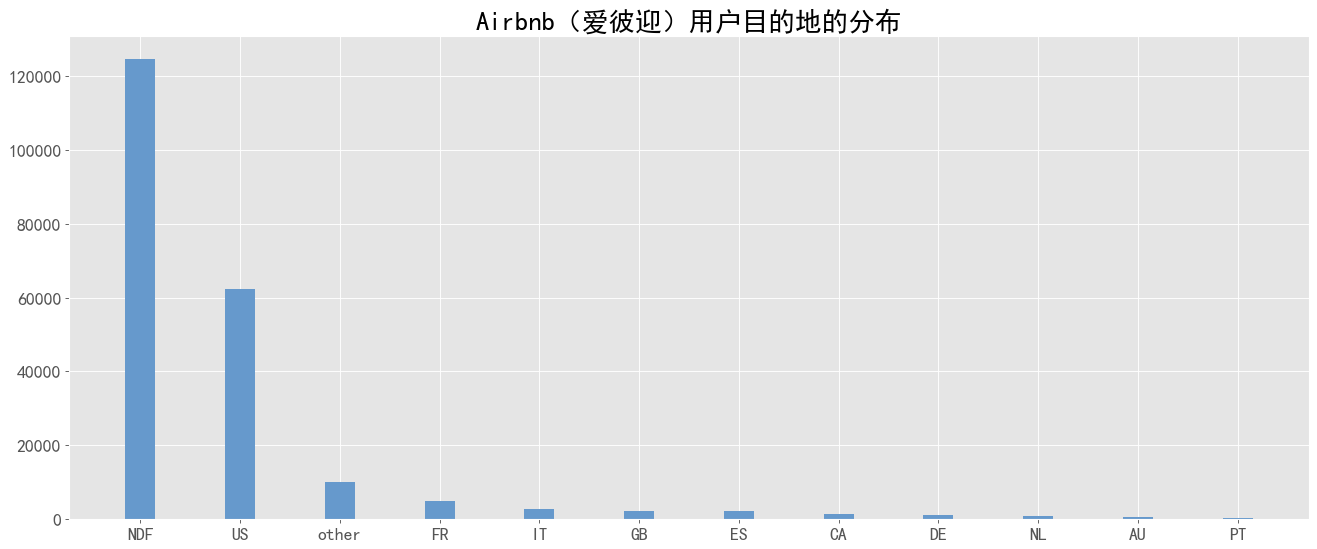

In [15]:
labels = user_destination_df['country_destination']
Y = user_destination_df['country_destination_count']


plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')

plt.title("Airbnb（爱彼迎）用户目的地的分布", size=24) # 图标题

plt.xticks(size=16) # x轴字体大小调整
plt.yticks(size=16) # y轴字体大小调整

plt.bar(labels, Y, width=0.3, color='#6699CC')

## 2、	推广渠道分析（user表）
### 每月新增用户趋势； 


In [16]:
# order_count_df = users_df.groupby('date_account_created')['date_account_created'].agg({'id':'count'}).sort_index()
# account_created_count_df.head()


# users_df.groupby('date_account_created').agg({'B': 'count'}).rename(columns={'B': 'count'}) 
'''
pandas 0.x ↑

pandas 1.x ↓
'''
users_account_count_df = users_df.groupby('date_account_created')['id'].agg([
        ('user_amount_count', 'count'),
    
        ]).reset_index()

users_account_count_df = users_account_count_df.sort_values(by=['user_amount_count','date_account_created'])
users_account_count_df

,date_account_created,user_amount_count
0,2010-01-01,1
1,2010-01-02,1
2,2010-01-03,1
6,2010-01-08,1
14,2010-01-19,1
...,...,...
1586,2014-05-14,622
1592,2014-05-20,632
1628,2014-06-25,636
1627,2014-06-24,670


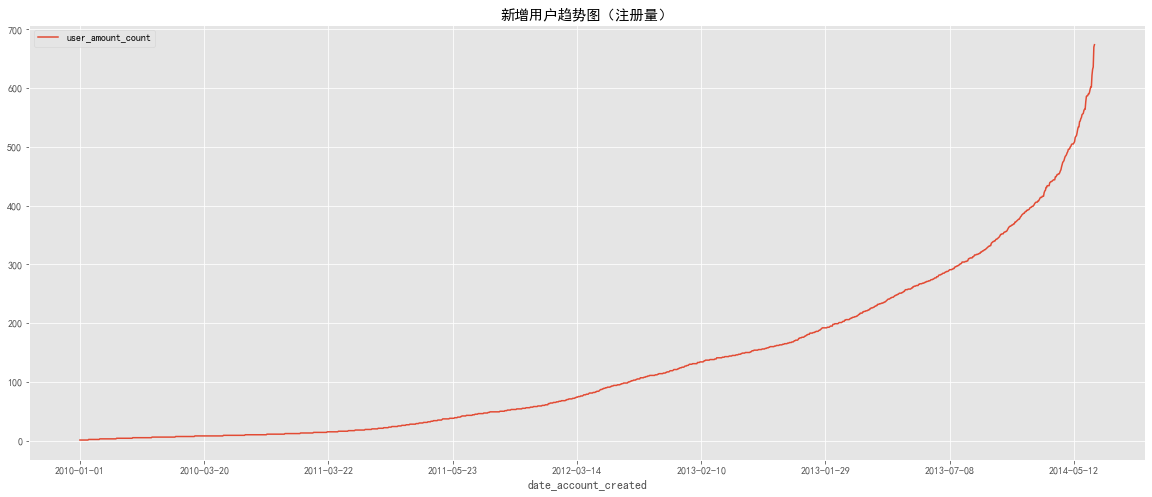

In [17]:
users_account_count_df = users_df.groupby('date_account_created')['id'].agg([
        ('user_amount_count', 'count'),
    
        ]).sort_values(by = ["user_amount_count"])
users_account_count_df.plot(figsize=(20,8),title = "新增用户趋势图（注册量）") 

In [18]:
first_active_df = users_df['timestamp_first_active'].astype("str")
first_active_df = first_active_df.str[0:8]
first_active_df = pd.concat([users_df['id'] ,first_active_df],axis=1)
first_active_df

,id,timestamp_first_active
0,gxn3p5htnn,20090319
1,820tgsjxq7,20090523
2,4ft3gnwmtx,20090609
3,bjjt8pjhuk,20091031
4,87mebub9p4,20091208
...,...,...
213446,zxodksqpep,20140630
213447,mhewnxesx9,20140630
213448,6o3arsjbb4,20140630
213449,jh95kwisub,20140630


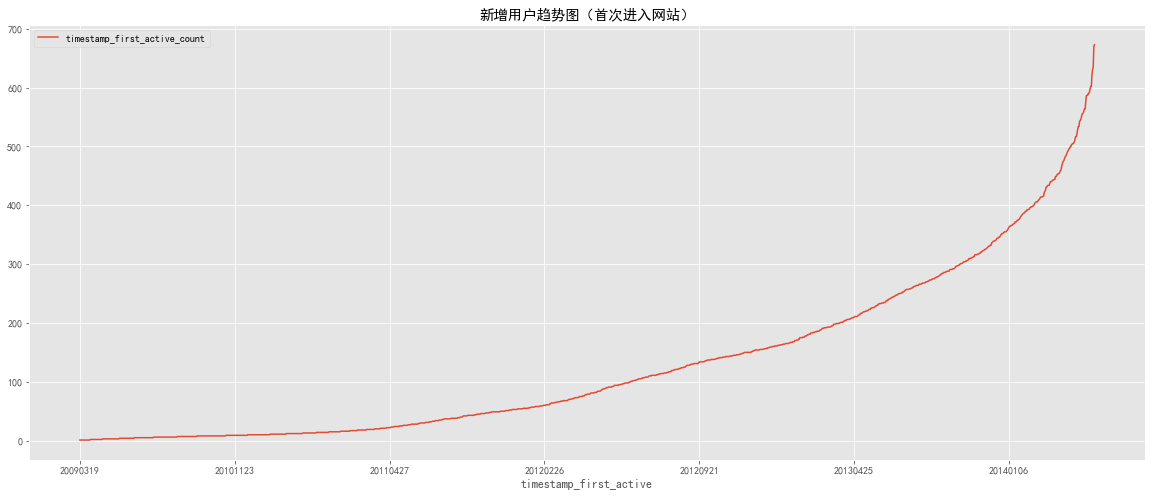

In [19]:
first_active_count_df = first_active_df.groupby('timestamp_first_active')['id'].agg([
        ('timestamp_first_active_count', 'count'),
    
        ]).sort_values(by = ["timestamp_first_active_count"])
first_active_count_df.plot(figsize=(20,8),title = "新增用户趋势图（首次进入网站）") 

### 不同推广渠道的注册量与转化率； 


* 转化率计算：通过该渠道注册数/总用户数


In [20]:
users_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [21]:
#统计个数
provider_count_df = users_df.groupby('affiliate_provider')['id'].agg([
        ('affiliate_provider_count', 'count'),
    
        ]).sort_values(by = ["affiliate_provider_count"],ascending=False).reset_index()
provider_count_df

#计算百分比
provider_count_df['affiliate_provider_Conversion_rates'] = provider_count_df['affiliate_provider_count']/provider_count_df['affiliate_provider_count'].sum()
provider_count_df

,affiliate_provider,affiliate_provider_count,affiliate_provider_Conversion_rates
0,direct,137426,0.643829
1,google,51693,0.242177
2,other,12549,0.058791
3,craigslist,3471,0.016261
4,bing,2328,0.010906
5,facebook,2273,0.010649
6,vast,829,0.003884
7,padmapper,768,0.003598
8,facebook-open-graph,545,0.002553
9,yahoo,496,0.002324


In [22]:


label = provider_count_df['affiliate_provider']
num = provider_count_df['affiliate_provider_Conversion_rates'].round(decimals=5)

def pie_base() -> Pie:
    c = (
        Pie()
        .add("", [list(z) for z in zip(label,
                                       num )],
            radius=100,
            )
        .set_global_opts(title_opts=opts.TitleOpts(title=" "))
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
        
    )
    return c

pie_base().render_notebook()


In [23]:

pie_base().render('affiliate_provider_Conversion_rates.html')

'D:\\教程\\京东&贪心科技数据分析\\作业项目\\3\\内容\\affiliate_provider_Conversion_rates.html'

In [24]:
#统计个数
channel_count_df = users_df.groupby('affiliate_channel')['id'].agg([
        ('affiliate_channel_count', 'count'),
    
        ]).sort_values(by = ["affiliate_channel_count"],ascending=False).reset_index()
channel_count_df

#计算百分比
channel_count_df['affiliate_channel_Conversion_rates'] = channel_count_df['affiliate_channel_count']/channel_count_df['affiliate_channel_count'].sum()
channel_count_df

,affiliate_channel,affiliate_channel_count,affiliate_channel_Conversion_rates
0,direct,137727,0.645239
1,sem-brand,26045,0.122019
2,sem-non-brand,18844,0.088283
3,other,8961,0.041982
4,seo,8663,0.040585
5,api,8167,0.038262
6,content,3948,0.018496
7,remarketing,1096,0.005135


In [25]:

label = channel_count_df['affiliate_channel']
num = channel_count_df['affiliate_channel_Conversion_rates'].round(decimals=5)

def pie_base() -> Pie:
    c = (
        Pie()
        .add("", [list(z) for z in zip(label,
                                       num )],
            radius=150,
            )
        .set_global_opts(title_opts=opts.TitleOpts(title=" "))
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
        
    )
    return c

pie_base().render_notebook()

In [26]:
pie_base().render('affiliate_channel_Conversion_rates.html')

'D:\\教程\\京东&贪心科技数据分析\\作业项目\\3\\内容\\affiliate_channel_Conversion_rates.html'

In [27]:
users_df['provider_channel'] = users_df['affiliate_provider']+"_"+users_df['affiliate_channel']
users_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,provider_channel
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,direct_direct
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,google_seo
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,direct_direct
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,direct_direct
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,direct_direct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,google_sem-brand
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,direct_direct
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,direct_direct
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,other_other


In [28]:
provider_channel_count_df = users_df.groupby('provider_channel')['id'].agg([
        ('provider_channel_count', 'count'),
    
        ]).sort_values(by = ["provider_channel_count"],ascending=False).reset_index()
provider_channel_count_df

,provider_channel,provider_channel_count
0,direct_direct,137426
1,google_sem-brand,25069
2,google_sem-non-brand,16947
3,other_api,8167
4,google_seo,5691
5,other_other,3656
6,craigslist_other,3471
7,google_content,2892
8,facebook_seo,1677
9,google_remarketing,1094


In [29]:
provider_channel_count_df['provider_channel_count_Conversion_rates'] = provider_channel_count_df['provider_channel_count']/provider_channel_count_df['provider_channel_count'].sum()
provider_channel_count_df

,provider_channel,provider_channel_count,provider_channel_count_Conversion_rates
0,direct_direct,137426,0.643829
1,google_sem-brand,25069,0.117446
2,google_sem-non-brand,16947,0.079395
3,other_api,8167,0.038262
4,google_seo,5691,0.026662
5,other_other,3656,0.017128
6,craigslist_other,3471,0.016261
7,google_content,2892,0.013549
8,facebook_seo,1677,0.007857
9,google_remarketing,1094,0.005125


In [30]:
label = provider_channel_count_df['provider_channel']
num = provider_channel_count_df['provider_channel_count_Conversion_rates'].round(decimals=5)

def pie_base() -> Pie:
    c = (
        Pie()
        .add("", [list(z) for z in zip(label,
                                       num )],
            radius=50,
            )
        .set_global_opts(title_opts=opts.TitleOpts(title=" "))
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
        
    )
    return c

pie_base().render_notebook()

In [31]:
pie_base().render('provider_channel_count_Conversion_rates.html')

'D:\\教程\\京东&贪心科技数据分析\\作业项目\\3\\内容\\provider_channel_count_Conversion_rates.html'

### 不同营销广告内容的注册量与转化率； 
* 转化率计算：通过该营销广告注册数/总用户数

In [32]:
#统计个数
first_affiliate_tracked_count_df = users_df.groupby('first_affiliate_tracked')['id'].agg([
        ('first_affiliate_tracked_count', 'count'),
    
        ]).sort_values(by = ["first_affiliate_tracked_count"],ascending=False).reset_index()
first_affiliate_tracked_count_df

#计算百分比
first_affiliate_tracked_count_df['first_affiliate_tracked_Conversion_rates'] = first_affiliate_tracked_count_df['first_affiliate_tracked_count']/first_affiliate_tracked_count_df['first_affiliate_tracked_count'].sum()
first_affiliate_tracked_count_df

,first_affiliate_tracked,first_affiliate_tracked_count,first_affiliate_tracked_Conversion_rates
0,untracked,109232,0.526709
1,linked,46287,0.223193
2,omg,43982,0.212078
3,tracked-other,6156,0.029684
4,product,1556,0.007503
5,marketing,139,0.000670
6,local ops,34,0.000164


In [33]:
label = first_affiliate_tracked_count_df['first_affiliate_tracked']
num = first_affiliate_tracked_count_df['first_affiliate_tracked_Conversion_rates'].round(decimals=5)

def pie_base() -> Pie:
    c = (
        Pie()
        .add("", [list(z) for z in zip(label,
                                       num )],
            radius=150,
            )
        .set_global_opts(title_opts=opts.TitleOpts(title=" "))
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
        
    )
    return c

pie_base().render_notebook()

In [34]:
pie_base().render('first_affiliate_tracked_Conversion_rates.html')

'D:\\教程\\京东&贪心科技数据分析\\作业项目\\3\\内容\\first_affiliate_tracked_Conversion_rates.html'

## 3、	转化漏斗分析（session表与user结合）

### 总用户数
    * 总用户计算方法：对sessions表中的user_id统计数量（去重），得出sessions表中所有的用户数量

In [35]:
sessions_df.shape

(10567737, 6)

In [36]:
sessions_df.drop_duplicates(['user_id'],keep='last',inplace=True)
sessions_df.shape

(135484, 6)

In [37]:
user_count = len(sessions_df['user_id'])
print("总用户数：",user_count)

总用户数： 135484


### 注册用户占比（注册用户总数量 / 用户总数量）
    * 注册用户计算方法：通过sessions表中的用户与注册用户表进行内关联，统计出sessions表中已注册用户数量


In [38]:
users_df.rename(columns={'id':'user_id'}, inplace = True)


In [39]:
new_sessions_df = pd.merge(sessions_df, users_df, how='left', on=['user_id'])
new_sessions_df

,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,timestamp_first_active,date_first_booking,gender,...,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,provider_channel
0,d1mm9tcy42,show,view,p3,Windows Desktop,76511.0,2014-01-01,2.014010e+13,2014-01-04,MALE,...,0.0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,google_sem-non-brand
1,yo8nz8bqcq,show,NaN,NaN,Mac Desktop,4080.0,2014-01-01,2.014010e+13,NaN,-unknown-,...,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,direct_direct
2,4grx6yxeby,personalize,data,wishlist_content_update,Windows Desktop,61374.0,2014-01-01,2.014010e+13,NaN,-unknown-,...,0.0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF,google_sem-brand
3,ncf87guaf0,personalize,data,wishlist_content_update,Windows Desktop,1254.0,2014-01-01,2.014010e+13,NaN,-unknown-,...,0.0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,direct_direct
4,4rvqpxoh3h,index,-unknown-,-unknown-,iPhone,886.0,2014-01-01,2.014010e+13,2014-01-02,-unknown-,...,25.0,en,direct,direct,untracked,iOS,iPhone,-unknown-,GB,direct_direct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135479,cv0na2lf5a,manage_listing,view,manage_listing,Windows Desktop,8962.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135480,zp8xfonng8,notifications,submit,notifications,Android Phone,8.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135481,fa6260ziny,personalize,data,wishlist_content_update,Windows Desktop,69.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135482,87k0fy4ugm,dashboard,view,dashboard,iPhone,2694.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
new_sessions_df1 = new_sessions_df
#统计个数

new_sessions_df1['date_account_created'].isnull().sum()#未注册用户

print("注册用户占比:",1-new_sessions_df1['date_account_created'].isnull().sum()/len(new_sessions_df1['user_id']))

注册用户占比: 0.5448244811195417


### 活跃用户（非僵尸用户）占比（活跃用户总数量 / 用户总数量）
    * 活跃用户计算方法：按照用户的操作总次数，如果用户操作产品大于等于10次，就可以说明用户为偏活跃的用户


In [41]:
sessions_df =pd.read_csv('data/sessions.csv', encoding = 'gbk')
new_sessions_df = pd.merge(sessions_df, users_df, how='left', on=['user_id'])
new_sessions_df

,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,timestamp_first_active,date_first_booking,gender,...,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,provider_channel
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,2014-01-01,2.014010e+13,2014-01-04,MALE,...,0.0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,google_sem-non-brand
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0,2014-01-01,2.014010e+13,2014-01-04,MALE,...,0.0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,google_sem-non-brand
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0,2014-01-01,2.014010e+13,2014-01-04,MALE,...,0.0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,google_sem-non-brand
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0,2014-01-01,2.014010e+13,2014-01-04,MALE,...,0.0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,google_sem-non-brand
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0,2014-01-01,2.014010e+13,2014-01-04,MALE,...,0.0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,google_sem-non-brand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
new_sessions_df.isnull().sum()

user_id                      34496
action                       79626
action_type                1126204
action_detail              1126204
device_type                      0
secs_elapsed                136031
date_account_created       5029780
timestamp_first_active     5029780
date_first_booking         8087490
gender                     5029780
age                        7145217
signup_method              5029780
signup_flow                5029780
language                   5029780
affiliate_channel          5029780
affiliate_provider         5029780
first_affiliate_tracked    5031121
signup_app                 5029780
first_device_type          5029780
first_browser              5029780
country_destination        5029780
provider_channel           5029780
dtype: int64

In [43]:
#统计个数
users_action_count_df = new_sessions_df.groupby('user_id')['user_id'].agg([
        ('users_action_count', 'count'),
    
        ]).sort_values(by = ["users_action_count"],ascending=False).reset_index()
users_action_count_df

#users_action_count_df[users_action_count_df['users_action_count'] >= 10]

print("活跃用户占比：",len(users_action_count_df[users_action_count_df['users_action_count'] >= 10]) /user_count)

活跃用户占比： 0.8414351510141419


In [44]:
'''活跃注册用户'''

'活跃注册用户'

### 下单用户占比（下单用户总数量 / 用户总数量）
    * 下单用户计算方法：用户行为中“reservations”为预定（下单）操作，通过统计进行了“reservations”的用户（并去重），得出下单用户的数量


In [45]:
reservations_user = new_sessions_df[(new_sessions_df['action_detail'] =='reservations') ]
reservations_user

,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,timestamp_first_active,date_first_booking,gender,...,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,provider_channel
111963,pug5921h1b,index,data,reservations,iPhone,14162.0,2014-01-06,2.014011e+13,NaN,-unknown-,...,25.0,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF,direct_direct
111972,pug5921h1b,index,data,reservations,iPhone,9547.0,2014-01-06,2.014011e+13,NaN,-unknown-,...,25.0,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF,direct_direct
111979,pug5921h1b,index,data,reservations,iPhone,490.0,2014-01-06,2.014011e+13,NaN,-unknown-,...,25.0,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF,direct_direct
111981,pug5921h1b,index,data,reservations,iPhone,14080.0,2014-01-06,2.014011e+13,NaN,-unknown-,...,25.0,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF,direct_direct
111991,pug5921h1b,index,data,reservations,iPhone,6354.0,2014-01-06,2.014011e+13,NaN,-unknown-,...,25.0,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF,direct_direct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10559350,ltd8uvna4h,index,data,reservations,iPhone,9792.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10559749,0wai4cjyn0,index,data,reservations,iPhone,9.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10560175,4vx0ysgds3,index,data,reservations,iPhone,9303.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10561778,tvyyjfaqet,index,data,reservations,iPhone,19.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
reservations_user = reservations_user.drop_duplicates(['user_id'],keep='first')#去重
print("下单用户比：",len(reservations_user['user_id'])/ user_count)

下单用户比： 0.07651826045879956


In [47]:
label_list = ['总用户数','注册用户',' 活跃用户','下单用户']
num_list=[]
num_list.append(user_count)#总数

users_action_count = len(users_action_count_df[users_action_count_df['users_action_count'] >= 10])
num_list.append(users_action_count) #活跃

account_created_count = user_count - new_sessions_df1['date_account_created'].isnull().sum()
num_list.append(account_created_count)#注册

num_list.append(len(reservations_user['user_id']))#下单

d = {'col1': label_list, '用户数': num_list}

df2 = pd.DataFrame(d)
df2['转化率']=df2['用户数']/user_count
df2

,col1,用户数,转化率
0,总用户数,135484,1.000000
1,注册用户,114001,0.841435
2,活跃用户,73815,0.544824
3,下单用户,10367,0.076518


In [48]:
#绘制漏斗图
from pyecharts import options as opts
from pyecharts.charts import Funnel
from pyecharts.faker import Faker

a = (
    Funnel()
    .add("用户", [list(z) for z in zip(label_list, num_list)])
    .set_global_opts(title_opts=opts.TitleOpts(title="Funnel"))
    .render("funnel_1.html")
)
